# Import and Install required libraries and packages

In [ ]:
# Import all required libraries or packages
import pandas as pd
import spacy_dbpedia_spotlight
import spacy
from PIL import Image
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans

In [4]:
# Required installation
pip install spacy-dbpedia-spotlight

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 718.6 kB/s eta 0:00:00 0:00:01
  Created wheel for spacy-dbpedia-spotlight: filename=spacy_dbpedia_spotlight-0.2.5-py3-none-any.whl size=12374 sha256=dfc5be352513ac41535e231513bfe3c6dbefa8c194409f8836d19aa07c8f5056
  Stored in directory: /root/.cache/pip/wheels/46/e3/4b/4c289240f23080afee46f3575697c76833a232ff0d469a4cea
Successfully built spacy-dbpedia-spotlight
Note: you may need to restart the kernel to use updated packages.


# Explore all Attributes of Clothing Items

In [5]:
# Explore articles attribute "garment_group_no"
articles = pd.read_csv('articles.csv')
print(articles.shape)
header = articles.head(5)
columns = articles.columns.values.tolist()
print(columns)
print(len(columns))
uniquness = articles["garment_group_no"].unique().size
print(uniquness)
print(min(articles["garment_group_no"].unique()))
print(max(articles["garment_group_no"].unique()))
print(articles.dtypes["garment_group_no"])
print(articles["garment_group_no"].sort_values())

(105542, 25)
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
25
21
1001
1025
int64
61585     1001
95603     1001
50815     1001
89808     1001
100115    1001
          ... 
66489     1025
49842     1025
49841     1025
66482     1025
87356     1025
Name: garment_group_no, Length: 105542, dtype: int64


In [6]:
# Explore articles attribute "detail_desc"
articles = pd.read_csv('articles.csv')
print(articles.shape)
header = articles.head(5)
columns = articles.columns.values.tolist()
print(columns)
print(len(columns))
uniquness = articles["detail_desc"].unique().size
print(uniquness)
col_type = articles.dtypes["detail_desc"]
print(col_type)
one_item = articles["detail_desc"][16]
print(one_item)
sorted_col = articles["detail_desc"].sort_values()
print(sorted_col)


(105542, 25)
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
25
43405
object
Trousers in sweatshirt fabric with an elasticated drawstring waist, side pockets, a back pocket and ribbed hems. Soft brushed inside.
20166     12 pairs earrings in various designs with a pa...
103165    14 pairs of metal earrings in various sizes an...
96336     2-piece set with a longer sweatshirt and match...
96335     2-piece set with a longer sweatshirt and match...
96334     2-piece set with a longer sweatshirt and match...
                      

In [7]:
# Explore articles attributes:
# product_group_name with value of "Garment Upper Body" in combination with garment_group_name
# product_type_name, department_name, section_name
articles = pd.read_csv('articles.csv')
print(articles.shape)
header = articles.head(5)
columns = articles.columns.values.tolist()
print(columns)
print(len(columns))
uniquness = articles["garment_group_name"].unique()
print(uniquness)
unique_number = articles["product_group_name"].unique()
print(unique_number)
col_type = articles.dtypes["garment_group_name"]
one_item = articles["garment_group_name"][16]
sorted_col = articles["garment_group_name"].sort_values()
unique_articles = articles.loc[articles["product_group_name"] == "Garment Upper body", "garment_group_name"]
print(unique_articles.unique())
unique_articles = articles.loc[articles["product_group_name"] == "Garment Lower body", "garment_group_name"]
print(unique_articles.unique())
unique_number = articles["product_type_name"].unique()
print(unique_number)
unique_number = articles["department_name"].unique()
print(unique_number)
unique_number = articles["section_name"].unique()
print(unique_number)

(105542, 25)
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
25
['Jersey Basic' 'Under-, Nightwear' 'Socks and Tights' 'Jersey Fancy'
 'Accessories' 'Trousers Denim' 'Outdoor' 'Shoes' 'Swimwear' 'Knitwear'
 'Shirts' 'Trousers' 'Dressed' 'Shorts' 'Dresses Ladies' 'Skirts'
 'Special Offers' 'Blouses' 'Unknown' 'Woven/Jersey/Knitted mix Baby'
 'Dresses/Skirts girls']
['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garmen

In [8]:
# Explore article attributes:
# index_code, index_name, graphical_appearance_name, colour_group_name, perceived_colour_master_name, perceived_colour_value_name
articles = pd.read_csv('articles.csv')
print(articles.shape)
header = articles.head(5)
columns = articles.columns.values.tolist()
print(columns)
print(len(columns))
uniquness = articles["index_code"].unique()
print(uniquness)
unique_number = articles["index_name"].unique()
print(unique_number)
col_type = articles.dtypes["garment_group_name"]
one_item = articles["garment_group_name"][16]
sorted_col = articles["garment_group_name"].sort_values()
unique_articles = articles.loc[articles["product_group_name"] == "Garment Upper body", "garment_group_name"]
unique_articles = articles.loc[articles["index_code"] == "C", "index_name"]
print(unique_articles.unique())
print(articles["graphical_appearance_name"].unique())
print(articles["colour_group_name"].unique())
print(articles["perceived_colour_master_name"].unique())
print(articles["perceived_colour_value_name"].unique())

(105542, 25)
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
25
['A' 'B' 'G' 'F' 'C' 'S' 'H' 'D' 'I' 'J']
['Ladieswear' 'Lingeries/Tights' 'Baby Sizes 50-98' 'Menswear'
 'Ladies Accessories' 'Sport' 'Children Sizes 92-140' 'Divided'
 'Children Sizes 134-170' 'Children Accessories, Swimwear']
['Ladies Accessories']
['Solid' 'Stripe' 'All over pattern' 'Melange' 'Transparent' 'Metallic'
 'Application/3D' 'Denim' 'Colour blocking' 'Dot' 'Other structure'
 'Contrast' 'Treatment' 'Check' 'Chambray' 'Front print'
 'Glittering/Metalli

In [9]:
# Explore article attributes:
# index_group_no, index_group_name
# product_group_name with value of "Garment Upper Body" in coordination with garment_group_name
articles = pd.read_csv('articles.csv')
print(articles.shape)
header = articles.head(5)
columns = articles.columns.values.tolist()
print(columns)
print(len(columns))
uniquness = articles["index_group_no"].unique()
print(uniquness)
unique_number = articles["index_group_name"].unique()
print(unique_number)
col_type = articles.dtypes["garment_group_name"]
one_item = articles["garment_group_name"][16]
sorted_col = articles["garment_group_name"].sort_values()
unique_articles = articles.loc[articles["product_group_name"] == "Garment Upper body", "garment_group_name"]
unique_articles = articles.loc[articles["index_group_no"] == 26, "index_group_name"]
print(unique_articles.unique())

(105542, 25)
['article_id', 'product_code', 'prod_name', 'product_type_no', 'product_type_name', 'product_group_name', 'graphical_appearance_no', 'graphical_appearance_name', 'colour_group_code', 'colour_group_name', 'perceived_colour_value_id', 'perceived_colour_value_name', 'perceived_colour_master_id', 'perceived_colour_master_name', 'department_no', 'department_name', 'index_code', 'index_name', 'index_group_no', 'index_group_name', 'section_no', 'section_name', 'garment_group_no', 'garment_group_name', 'detail_desc']
25
[ 1  4  3 26  2]
['Ladieswear' 'Baby/Children' 'Menswear' 'Sport' 'Divided']
['Sport']


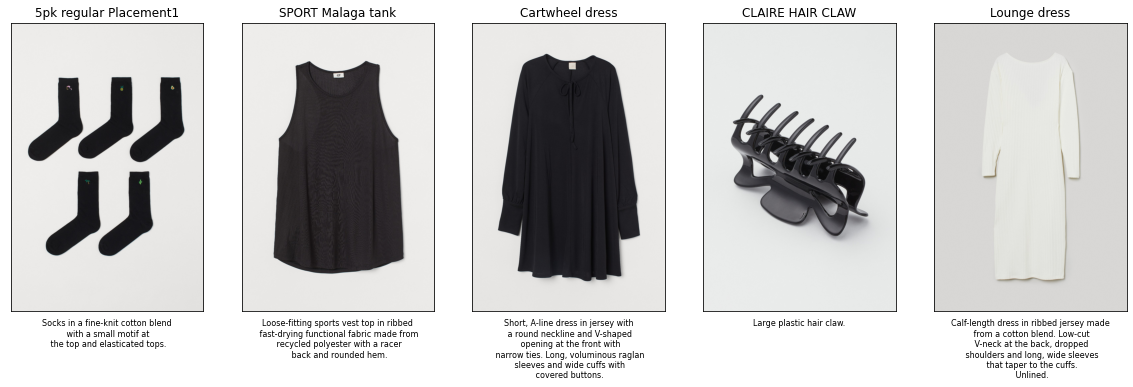

In [10]:
# Plot article images and their descriptions
fig, ax = plt.subplots(1,5, figsize=(20,10))
i = 0
for row in articles.tail(5).iterrows():
    article_id = row[1]['article_id']
    prod_name = row[1]['prod_name']
    desc = row[1]['detail_desc']
    desc = desc.split(" ")
    for j in range(len(desc)):
        if j%5==0 and j!=0:
            desc[j] += '\n'
    desc = " ".join(desc)
    image = Image.open(f'/kaggle/input/h-and-m-personalized-fashion-recommendations/images/0{str(article_id)[0:2]}/0{article_id}.jpg')
    ax[i].imshow(image)
    ax[i].set_title(prod_name)
    ax[i].set_xticks([], [])
    ax[i].set_yticks([], [])
    ax[i].grid(False)
    ax[i].set_xlabel(desc, fontsize=8)
    i += 1

In [12]:
# Explore article attribute "detail_desc"
articles_description = articles['detail_desc']
articles_sample = articles_description
print(articles_sample)

0                   Jersey top with narrow shoulder straps.
1                   Jersey top with narrow shoulder straps.
2                   Jersey top with narrow shoulder straps.
3         Microfibre T-shirt bra with underwired, moulde...
4         Microfibre T-shirt bra with underwired, moulde...
                                ...                        
105537    Socks in a fine-knit cotton blend with a small...
105538    Loose-fitting sports vest top in ribbed fast-d...
105539    Short, A-line dress in jersey with a round nec...
105540                             Large plastic hair claw.
105541    Calf-length dress in ribbed jersey made from a...
Name: detail_desc, Length: 105542, dtype: object


In [13]:
# Explore article attribute "garment_group_name"
garment_groups = articles['garment_group_name']
garments_sample = garment_groups
print(garments_sample)

0              Jersey Basic
1              Jersey Basic
2              Jersey Basic
3         Under-, Nightwear
4         Under-, Nightwear
                ...        
105537     Socks and Tights
105538         Jersey Fancy
105539         Jersey Fancy
105540          Accessories
105541         Jersey Fancy
Name: garment_group_name, Length: 105542, dtype: object


# Selection and Engineering of Attributes

In [77]:
# Explore article attributes "article_id", "garment_group_name", "detail_desc" for the Trousers
all_trousers = articles.loc[articles['garment_group_name'] == 'Trousers']
all_trousers = all_trousers[['article_id', 'garment_group_name', 'detail_desc']]
print(all_trousers)
print(len(all_trousers))
unique_articles = all_trousers.drop_duplicates(subset='detail_desc')
print(unique_articles)
articles_sample = unique_articles
print(articles_sample)
print(len(articles_sample))
articles_sample['article_id_detail_desc'] = list(zip(articles_sample.article_id, articles_sample.detail_desc))

        article_id garment_group_name  \
274      212766041           Trousers   
275      212766042           Trousers   
276      212766043           Trousers   
277      212766045           Trousers   
278      212766046           Trousers   
...            ...                ...   
105260   935692002           Trousers   
105309   936726001           Trousers   
105310   936726002           Trousers   
105313   936819001           Trousers   
105471   943097001           Trousers   

                                              detail_desc  
274     Joggers in washed cotton twill with an elastic...  
275     Joggers in washed cotton twill with an elastic...  
276     Joggers in washed cotton twill with an elastic...  
277     Joggers in washed cotton twill with an elastic...  
278     Joggers in washed cotton twill with an elastic...  
...                                                   ...  
105260  Tailored trousers in a stretch weave made from...  
105309  5-pocket, ankle-len

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [78]:
# Generated a new column combining "article_id" and "detail_desc" as a single attrubute as shown in following print
print(articles_sample)

        article_id garment_group_name  \
274      212766041           Trousers   
322      219075014           Trousers   
432      241412038           Trousers   
481      249136006           Trousers   
500      252298014           Trousers   
...            ...                ...   
105253   935659001           Trousers   
105259   935692001           Trousers   
105309   936726001           Trousers   
105313   936819001           Trousers   
105471   943097001           Trousers   

                                              detail_desc  \
274     Joggers in washed cotton twill with an elastic...   
322     Cargo trousers in washed Oxford cotton with si...   
432     Leggings in patterned jersey with an elasticat...   
481     Ankle-length jeans in washed stretch denim wit...   
500     Jeans in washed, stretch denim with hard-worn ...   
...                                                   ...   
105253  Trousers in a soft weave. Regular waist with c...   
105259  Tailored tr

# Employ spacy-dbpedia-spotlight for Concepts Extraction

In [79]:
# A new blank model is created, with the language code provided in the parameter
nlp = spacy_dbpedia_spotlight.create('en')
# In this case, the pipeline contains the EntityLinker
print(nlp.pipe_names)
nlp = spacy.blank('en')
nlp.add_pipe('dbpedia_spotlight')
doc = nlp('Joggers in washed cotton twill with an elasticated drawstring waist, side and back pockets and elasticated hems. Loose fit.')
print([(ent.text, ent._.dbpedia_raw_result['@similarityScore']) for ent in doc.ents])
for ent in doc.ents:
    print(ent)
    print(ent._.dbpedia_raw_result['@similarityScore'])

['dbpedia_spotlight']
[('cotton', '0.9999999956899046'), ('twill', '0.9999999999997158'), ('drawstring', '1.0'), ('Loose', '0.6322307028190571')]
cotton
0.9999999956899046
twill
0.9999999999997158
drawstring
1.0
Loose
0.6322307028190571


In [80]:
# Get key elements from article's description along with their probability values
articles_sample1 = articles_sample['article_id_detail_desc']
articles_sample1 = (list(articles_sample1))
key_elements_all_trousers = []
for i in range(100):
    j = articles_sample1[i][1]
    j = str(j)
    doc = nlp(j)
    key_elements_per_trouser = []
    for ent in doc.ents:
        key_elements_per_trouser.append(ent.text)
        key_elements_per_trouser.append(float(ent._.dbpedia_raw_result['@similarityScore']))
    key_elements_all_trousers.append(articles_sample1[i][0])
    key_elements_all_trousers.append(articles_sample1[i][1])
    key_elements_all_trousers.append(key_elements_per_trouser)
print(key_elements_all_trousers)

[212766041, 'Joggers in washed cotton twill with an elasticated drawstring waist, side and back pockets and elasticated hems. Loose fit.', ['cotton', 0.9999999956899046, 'twill', 0.9999999999997158, 'drawstring', 1.0, 'Loose', 0.6322307028190571], 219075014, 'Cargo trousers in washed Oxford cotton with side pockets, back pockets and leg pockets with a flap and press-stud, seams at the knees and drawstring hems.', ['Oxford', 0.7911508958089538, 'cotton', 0.9999999832086531, 'drawstring', 1.0], 241412038, 'Leggings in patterned jersey with an elasticated waist.', ['Leggings', 0.9999999943103006], 249136006, 'Ankle-length jeans in washed stretch denim with fake front pockets, real back pockets and tapered legs. Wide jersey ribbing at the waist for best fit.', ['jeans', 1.0, 'denim', 1.0], 252298014, 'Jeans in washed, stretch denim with hard-worn details, a regular waist, front and back pockets and skinny legs.', ['denim', 1.0], 254940026, '5-pocket trousers in superstretch twill with slim

In [ ]:
#sort elements of the trouser based on their probability value 
print(key_elements_all_trousers[0])
for i in range(100):
    for j in range(len(key_elements_all_trousers[i])):
        if type(key_elements_all_trousers[i][j]) is float:
            for k in range(1, len(key_elements_all_trousers[i])):
                if type(key_elements_all_trousers[i][k]) is float:
                    if key_elements_all_trousers[i][k] < key_elements_all_trousers[i][j]:
                        x = key_elements_all_trousers[i][k]
                        y = key_elements_all_trousers[i][k-1]
                        key_elements_all_trousers[i][k] = key_elements_all_trousers[i][j]
                        key_elements_all_trousers[i][k-1] = key_elements_all_trousers[i][j-1]
                        key_elements_all_trousers[i][j] = x
                        key_elements_all_trousers[i][j-1] = y
    print(key_elements_all_trousers[i])

In [ ]:
# Get total count of design elements in a trouser
print(key_elements_all_trousers[2])
for i in range (len(key_elements_all_trousers)):
    if len(key_elements_all_trousers[i]) > 0:
        length_of_elements = len(key_elements_all_trousers[i])
        key_elements_all_trousers[i].append(length_of_elements/2)
        
    elif len(key_elements_all_trousers[i]) == 0:
        key_elements_all_trousers[i].append(0)
        
print(key_elements_all_trousers)

In [96]:
# Get design elements of each trouser
key_elements_only_all_trousers = []
for i in range(100):
    j = articles_sample1[i][1]
    j = str(j)
    doc = nlp(j)
    key_elements_only_per_trouser = []
    key_elements = []
    key_elements_only_per_trouser.append(articles_sample1[i][0])
    key_elements_only_per_trouser.append(articles_sample1[i][1])
    for ent in doc.ents:
        key_elements.append(ent.text)
    key_elements_only_per_trouser.append(key_elements)
    key_elements_only_all_trousers.append(key_elements_only_per_trouser)  
print(key_elements_only_all_trousers)

[[212766041, 'Joggers in washed cotton twill with an elasticated drawstring waist, side and back pockets and elasticated hems. Loose fit.', ['cotton', 'twill', 'drawstring', 'Loose']], [219075014, 'Cargo trousers in washed Oxford cotton with side pockets, back pockets and leg pockets with a flap and press-stud, seams at the knees and drawstring hems.', ['Oxford', 'cotton', 'drawstring']], [241412038, 'Leggings in patterned jersey with an elasticated waist.', ['Leggings']], [249136006, 'Ankle-length jeans in washed stretch denim with fake front pockets, real back pockets and tapered legs. Wide jersey ribbing at the waist for best fit.', ['jeans', 'denim']], [252298014, 'Jeans in washed, stretch denim with hard-worn details, a regular waist, front and back pockets and skinny legs.', ['denim']], [254940026, '5-pocket trousers in superstretch twill with slim legs and a high waist.', ['twill', 'slim']], [262277009, 'Trousers in washed, superstretch twill with fake front pockets, real back p

# Cloth Key Concepts Extraction Product-type wise

 The product types that were analysed include following:
  
1) Trousers
2) Dresses/Skirts
3) Jacket
4) Blouse
5) Sweater 
6) Top
7) Shirts 

The following code refers to only instance of Trousers that was replicated for all the remaining types. The complete implementation is avaialbe on the website:

 https://dev-fashionshopon.pantheonsite.io/welcome

In [100]:
# Get total count of an element in the all trousers (element-wise grouping of trousers)
last_list=[]
for k in range(len(key_elements_only_all_trousers)):    
    prod_list = []
    for i in key_elements_only_all_trousers[k][2]:
        new_list = []
        mew_list = []
        
        for j in range(1, len(key_elements_only_all_trousers)-1):
            if i in key_elements_only_all_trousers[j][2]:         
                    new_list.append(key_elements_only_all_trousers[j][0])
                                      
        count_key = len(new_list)
        name_key = i
        mew_list.append(count_key)
        mew_list.append(name_key)
        mew_list.append(new_list)
        prod_list.append(mew_list)
        
    last_list.append(prod_list)

print(last_list)              

[[[26, 'cotton', [219075014, 384482001, 393772001, 395619001, 411758001, 426541036, 448509001, 451243004, 451271005, 451402002, 466595001, 478818001, 481420010, 482160001, 484760002, 484766005, 487262003, 490676001, 491912001, 491913001, 493197001, 499787002, 499788003, 501115001, 501117001, 501118002]], [31, 'twill', [254940026, 262277009, 297796002, 299668015, 304946034, 352811001, 384482001, 393772001, 395619001, 411758001, 416157003, 434429007, 439285001, 451243004, 451271005, 456007001, 466595001, 467297004, 478818001, 482178001, 483101001, 484760002, 484766005, 485950005, 487262003, 490676001, 491912001, 491913001, 493197001, 497706002, 501117001]], [8, 'drawstring', [219075014, 393772001, 466599001, 482194001, 482199001, 485521001, 490176001, 491696003]], [1, 'Loose', [484766005]]], [[1, 'Oxford', [219075014]], [26, 'cotton', [219075014, 384482001, 393772001, 395619001, 411758001, 426541036, 448509001, 451243004, 451271005, 451402002, 466595001, 478818001, 481420010, 482160001, 

In [102]:
# Removal of duplications from the above code cell
check_list = []
last_list=[]
for k in range(len(key_elements_only_all_trousers)):    
    prod_list = []
    for i in key_elements_only_all_trousers[k][2]:
        new_list = []
        mew_list = []
        
        for j in range(1, len(key_elements_only_all_trousers)-1):
            if i in key_elements_only_all_trousers[j][2]:
                if i not in check_list:
                    new_list.append(key_elements_only_all_trousers[j][0])
                    #products_id = new_list                   
        count_key = len(new_list)
        name_key = i
        mew_list.append(count_key)
        mew_list.append(name_key)
        mew_list.append(new_list)
        prod_list.append(mew_list)
        check_list.append(i)
    last_list.append(prod_list)

print(last_list)              
    

[[[26, 'cotton', [219075014, 384482001, 393772001, 395619001, 411758001, 426541036, 448509001, 451243004, 451271005, 451402002, 466595001, 478818001, 481420010, 482160001, 484760002, 484766005, 487262003, 490676001, 491912001, 491913001, 493197001, 499787002, 499788003, 501115001, 501117001, 501118002]], [31, 'twill', [254940026, 262277009, 297796002, 299668015, 304946034, 352811001, 384482001, 393772001, 395619001, 411758001, 416157003, 434429007, 439285001, 451243004, 451271005, 456007001, 466595001, 467297004, 478818001, 482178001, 483101001, 484760002, 484766005, 485950005, 487262003, 490676001, 491912001, 491913001, 493197001, 497706002, 501117001]], [8, 'drawstring', [219075014, 393772001, 466599001, 482194001, 482199001, 485521001, 490176001, 491696003]], [1, 'Loose', [484766005]]], [[1, 'Oxford', [219075014]], [0, 'cotton', []], [0, 'drawstring', []]], [[3, 'Leggings', [241412038, 413707001, 426541036]]], [[16, 'jeans', [249136006, 294076007, 297898002, 399256018, 412707025, 41

In [104]:
# Get unique key design elements 
all_keys = []
for i in range(len(key_elements_only_all_trousers)):
    for j in range(len(key_elements_only_all_trousers[i][2])):
        all_keys.append(key_elements_only_all_trousers[i][2][j])
all_unique_keys = set(all_keys)
print(all_unique_keys)
print(len(all_unique_keys))

{'placket', 'crêpe', 'corduroy', 'jeans', 'Twill', 'Loose', 'dungarees', 'coin', 'fastener', 'Leggings', 'Pencil skirt', 'cap', 'drawstring', 'hook', 'Strapless', 'wool', 'Tuxedo', 'slim', 'Low-rise jeans', 'Tencel', 'slim-fit jeans', 'embroidery', 'button fly', 'low-rise jeans', 'lyocell', 'cotton', 'jumpsuit', 'bow', 'turn-ups', 'Oxford', 'leggings', 'metal', 'denim', 'twill', 'viscose', 'Chino', 'satin', 'silicone', 'Jumpsuit'}
39


In [105]:
# Get all articles along with their respective design elements
got_features = []
for i in all_unique_keys:
    for j in range(len(last_list)):
        for k in range(len(last_list[j])):
            if last_list[j][k][1] == i:
                got_features.append(last_list[j][k])
                
for t in got_features[:]:
        if t[0] == 0:
            got_features.remove(t)

print(got_features)

[[1, 'placket', [482160001]], [1, 'crêpe', [479823001]], [3, 'corduroy', [484767008, 499787002, 501118002]], [16, 'jeans', [249136006, 294076007, 297898002, 399256018, 412707025, 416511001, 416961004, 430694015, 448509001, 448515001, 451380001, 458428031, 482176001, 484911005, 491011003, 500764001]], [1, 'Twill', [497709001]], [1, 'Loose', [484766005]], [1, 'dungarees', [481529006]], [3, 'coin', [451271005, 490676001, 501115001]], [10, 'fastener', [350082029, 384482001, 391772001, 451402002, 452516005, 459144008, 466599001, 470478003, 479750003, 497709001]], [3, 'Leggings', [241412038, 413707001, 426541036]], [1, 'Pencil skirt', [455828001]], [1, 'cap', [456007001]], [8, 'drawstring', [219075014, 393772001, 466599001, 482194001, 482199001, 485521001, 490176001, 491696003]], [1, 'hook', [499788003]], [1, 'Strapless', [479823001]], [3, 'wool', [452516005, 497706002, 497709001]], [1, 'Tuxedo', [497728001]], [17, 'slim', [254940026, 304946034, 336881001, 352811001, 411758001, 434429007, 44

In [106]:
# Make dataframe including article ids and design concepts as two separate columns
frames = []
for i in got_features:
    index1 = i[2]
    num = len(i[2])
    concept = i[1]
    lst = [concept] * num  
    df_add = pd.DataFrame(list(zip(index1, lst)), columns =['Product number', 'Design concept']) 
    frames.append(df_add)
df_trousers = pd.concat(frames, ignore_index = True)
print(df_trousers.head(n=50))

    Product number Design concept
0        482160001        placket
1        479823001          crêpe
2        484767008       corduroy
3        499787002       corduroy
4        501118002       corduroy
5        249136006          jeans
6        294076007          jeans
7        297898002          jeans
8        399256018          jeans
9        412707025          jeans
10       416511001          jeans
11       416961004          jeans
12       430694015          jeans
13       448509001          jeans
14       448515001          jeans
15       451380001          jeans
16       458428031          jeans
17       482176001          jeans
18       484911005          jeans
19       491011003          jeans
20       500764001          jeans
21       497709001          Twill
22       484766005          Loose
23       481529006      dungarees
24       451271005           coin
25       490676001           coin
26       501115001           coin
27       350082029       fastener
28       38448

In [107]:
# Modify the dataframe by grouping all design concepts along the row containing respective article id
df = df_trousers.groupby('Product number').agg({'Design concept': ', '.join}).reset_index()
print(df.head(50))

    Product number                          Design concept
0        219075014              drawstring, cotton, Oxford
1        241412038                                Leggings
2        249136006                            jeans, denim
3        252298014                                   denim
4        254940026                             slim, twill
5        262277009                                   twill
6        294076007                            jeans, denim
7        297796002                         turn-ups, twill
8        297898002                            jeans, denim
9        299668015                                   twill
10       300024006                                   denim
11       304946034                             slim, twill
12       336881001                                    slim
13       350082029                                fastener
14       352811001                             slim, twill
15       358254004                                 visco

# Encode the Extracted Concepts by One-Hot Encoding

In [108]:
# Perform one-hot encoding for "Design concept" column
df1 = df['Design concept'].str.get_dummies(sep = ',')
df3 = pd.concat([df, df1], axis=1)
print(df3)
print(df3.columns)

    Product number              Design concept   Chino   Oxford   Strapless  \
0        219075014  drawstring, cotton, Oxford       0        1           0   
1        241412038                    Leggings       0        0           0   
2        249136006                jeans, denim       0        0           0   
3        252298014                       denim       0        0           0   
4        254940026                 slim, twill       0        0           0   
..             ...                         ...     ...      ...         ...   
89       499878001           leggings, viscose       0        0           0   
90       500764001    jeans, button fly, denim       0        0           0   
91       501115001          coin, slim, cotton       0        0           0   
92       501117001               cotton, twill       0        0           0   
93       501118002            corduroy, cotton       0        0           0   

     Tencel   bow   button fly   cotton   denim  ..

# Cluster Items by Key Clothing (e.g. Design) Concepts

In [110]:
# Define the model for clustering
kmeans = KMeans(n_clusters=10)
label = kmeans.fit_predict(df1)
print(label)



[5 1 2 1 9 4 2 0 2 4 1 9 1 7 9 8 1 7 7 5 0 2 9 2 2 1 4 2 2 3 2 9 4 1 2 2 9
 6 2 7 7 1 0 1 2 7 2 0 7 4 1 7 1 9 7 1 9 2 3 2 4 2 5 5 9 0 9 3 2 8 5 4 1 0
 5 6 2 1 1 5 0 0 9 0 1 1 8 3 3 1 2 6 0 3]


(10,)
(10, 49)


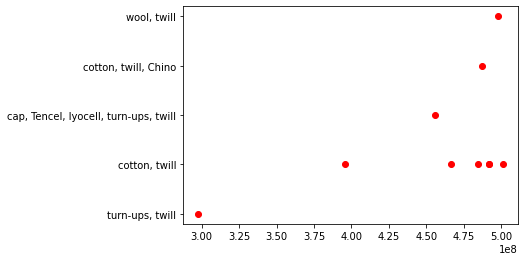

In [111]:
# Plot for one cluster items along with their respective design concepts
filtered_label0 = df3[label == 0]
print(filtered_label0.loc[:, 'Product number'].shape)
print(filtered_label0.iloc[:, 2:].shape)
plt.scatter(filtered_label0.loc[:, 'Product number'] , filtered_label0.loc[:, 'Design concept'], c = 'red')
plt.show()

In [112]:
# Get unique design concepts for a cluster and use them for mapping to list of items in the respective cluser
final_clusters = []
final_product_clusters = []
u_labels = set(label)
for i in u_labels:
    filtered_label = df3[label == i]
    final_clusters.append(filtered_label['Design concept'])
    final_product_clusters.append(filtered_label['Product number'])
print(final_clusters[9])
unique_list = []
for x in final_clusters[9]:
    y = x.split(', ')
    for i in y:
        if i not in unique_list:
            unique_list.append(i)           
print(unique_list)

unique_list_with_prods = []
unique_list_with_prods.append(list(final_product_clusters[9]))
print(unique_list_with_prods)
    

4                   slim, twill
11                  slim, twill
14                  slim, twill
22          slim, cotton, twill
31                  slim, twill
36          slim, cotton, twill
53          slim, cotton, twill
56                 slim, cotton
64                  slim, twill
66    Loose, cotton, bow, twill
82          slim, cotton, twill
Name: Design concept, dtype: object
['slim', 'twill', 'cotton', 'Loose', 'bow']
[[254940026, 304946034, 352811001, 411758001, 434429007, 451243004, 478818001, 481420010, 483101001, 484766005, 493197001]]


In [113]:
# Get all clusters of trousers; each cluster refers to a list of items and their common design elements
all_trousers_clusters = []
for k in range(len(final_clusters)):
    unique_list = []
    for x in final_clusters[k]:
        y = x.split(', ')
        for i in y:
            if i not in unique_list:
                unique_list.append(i)           
    unique_list.append(list(final_product_clusters[k]))
    all_trousers_clusters.append(unique_list)

print(all_trousers_clusters)

[['turn-ups', 'twill', 'cotton', 'cap', 'Tencel', 'lyocell', 'Chino', 'wool', [297796002, 395619001, 456007001, 466595001, 484760002, 487262003, 491912001, 491913001, 497706002, 501117001]], ['Leggings', 'denim', 'slim', 'turn-ups', 'Pencil skirt', 'crêpe', 'Strapless', 'jumpsuit', 'silicone', 'satin', 'Jumpsuit', 'metal', 'Twill', 'fastener', 'wool', 'Tuxedo', 'leggings', 'viscose', [241412038, 252298014, 300024006, 336881001, 384263008, 413707001, 442786001, 455828001, 456011001, 469562002, 478549001, 479823001, 486633001, 491039003, 491692002, 497709001, 497728001, 499878001]], ['jeans', 'denim', 'Low-rise jeans', 'slim', 'button fly', 'cotton', 'slim-fit jeans', 'dungarees', 'low-rise jeans', 'embroidery', [249136006, 294076007, 297898002, 399256018, 412031001, 412707025, 416511001, 416961004, 430694015, 448509001, 448515001, 451380001, 458428031, 466579004, 481529006, 482176001, 482192001, 484911005, 491011003, 500764001]], ['Leggings', 'cotton', 'placket', 'turn-ups', 'corduroy',